<a href="https://colab.research.google.com/github/kvinne-anc/Linear-Alg-Dimensionality_Reduction/blob/master/Var_CoVar_Matrices_TitanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list

In [ ]:
import math 
import numpy as np 
import pandas as pd 

In [ ]:
sales=[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [ ]:
total = sum(sales)
mean_sales = total/len(sales)
print("mean sales: ", mean_sales)

mean sales:  3052.714285714286


In [ ]:
def subtract_mean(number):
    return number-mean_sales

lambda x: x-mean_sales

<function __main__.<lambda>>

In [ ]:
val = list(map(subtract_mean, sales))

In [ ]:
sqrd_val = list(map(lambda x: x**2, val))

In [ ]:
list_length=len(sqrd_val)

In [ ]:
var_sales = sum(sqrd_val)/list_length
print('{:.2f}'.format(var_sales,3))

183761.06


In [ ]:
print('{:.2f}'.format(math.sqrt(var_sales)))
print('{:.2f}'.format(np.sqrt(var_sales)))

428.67
428.67


In [ ]:
print(np.mean(sales))
print('{:.2f}'.format(np.var(sales)))
print('{:.2f}'.format(np.std(sales)))

3052.714285714286
183761.06
428.67


1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
cust=[127, 80, 105, 92, 120, 115, 93]

In [ ]:
print('{:.2f}'.format(np.cov(sales, cust)[0][1]))

7604.36


1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
print('{:.2f}'.format(np.std(cust)))

15.79


In [ ]:
print('{:.2f}'.format(np.std(sales)))

428.67


In [ ]:
sales1 = np.array(sales)
sales1

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [ ]:
cust1 = np.array(cust)
cust1

array([127,  80, 105,  92, 120, 115,  93])

In [ ]:
std_s = sales1.std(ddof=1)
std_c = cust1.std(ddof=1)

std_s

463.0204150595357

In [ ]:
std_c

17.057326313123664

In [ ]:
sales2 = pd.DataFrame({"sales": sales})
sales2

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [ ]:
sales2['cust'] = pd.Series(cust)
print('{:.2f}'.format(sales2.cov().values[0][1]))

7604.36


In [ ]:
sales2.corr()

,sales,cust
sales,1.000000,0.962834
cust,0.962834,1.000000


1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: Titanic Dataset

Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
url = ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [ ]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [ ]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


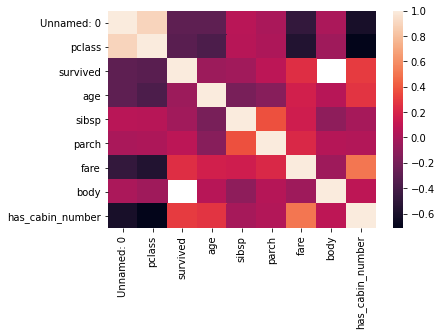

In [ ]:
import seaborn as sns
sns.heatmap(titanic.corr());

Orthogonality
2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
v_1 = [3, 3]
v_2 = [2, -2]

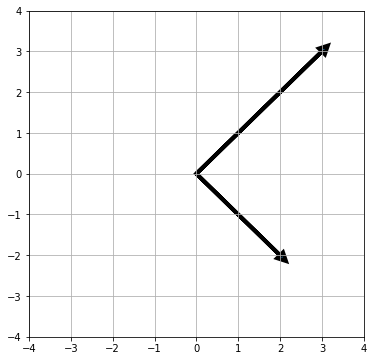

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid()
plt.xlim(-4,4)          
plt.ylim(-4,4)

for vect in [v_1, v_2]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

2.2 Are the following vectors orthogonal? Why or why not?
$$\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}$$

In [ ]:
a = np.array([-5,3,7])
a

array([-5,  3,  7])

In [ ]:
b = np.array([6,-8,2])
b

array([ 6, -8,  2])

In [ ]:
np.dot(a,b)

-40

In [ ]:
#Not orthogonal because the dot product is not equal to zero. 

2.3 Compute the following values: What do these quantities have in common?
What is $||c||^2$?
What is $c \cdot c$?
What is $c^{T}c$?


In [ ]:
c = np.array([2,-15,6,20])
c

array([  2, -15,   6,  20])

In [ ]:
norm_c = np.linalg.norm(c)
print('{:.4f}'.format(norm_c))

25.7876


In [ ]:
normc2 = (norm_c)**2
normc2

665.0

In [ ]:
np.dot(c,c)

665

In [ ]:
pd.DataFrame(c)

,0
0,2
1,-15
2,6
3,20


In [ ]:
ct = pd.DataFrame(c.T)
ct

,0
0,2
1,-15
2,6
3,20


In [ ]:
np.matmul(c,c.T)

665

In [ ]:
#Can't do Ct C because they do not have the same dimensions and cannot be multiplied
#I'm guessing they wrote it backwards and the result should come out equal to the others
#The other two are equivalent and c cT is also equivalent

Unit Vectors
3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:
$$\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}$$

$$\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}$$

3.2 Turn vector $f$ into a unit vector:
$$\begin{align}
f = \begin{bmatrix} 4 &amp; 12 &amp; 11 &amp; 9 &amp; 2 \end{bmatrix}
\end{align}$$

In [ ]:
f = np.array([4,12,11,9,2])
f

array([ 4, 12, 11,  9,  2])

In [ ]:
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]



4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).
Span



In [ ]:
v_3 = [-1, 3]
v_4 = np.multiply(v_3, 2)
print(v_3, '\n', v_4)

[-1, 3] 
 [-2  6]


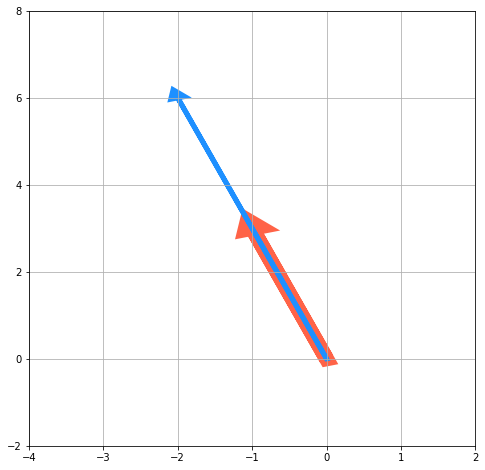

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-4,2)          
plt.ylim(-2,8)

for myvect, mycolor, width in [(v_3, 'tomato', 15), (v_4, 'dodgerblue', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [ ]:
vector_5 = np.random.randint(low=-4, high=4, size=2)
vector_6 = np.random.randint(low=-3, high=3, size=2)
print(vector_5, '\n', vector_6)

[ 1 -1] 
 [2 1]


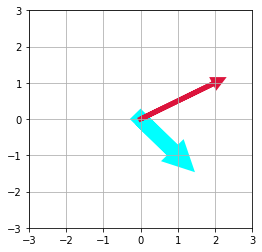

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_5, 'cyan', 15), (vector_6, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

5.1 What is the span of the following vectors?
$$\begin{align}
g = \begin{bmatrix} 1 &amp; 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 &amp; 8 \end{bmatrix}
\end{align}$$

In [ ]:
g = np.array([1,2])
h = np.array([4,8])

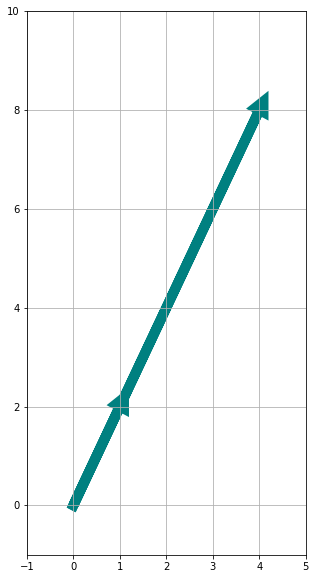

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-1,10)

for myvect in [g, h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='teal')

In [ ]:
#The span is zero. 

6.1 Graph two vectors that form a basis for $\mathbb{R}^2$

In [ ]:
R1 = np.array([3,3])
R2 = np.array([3,-3])

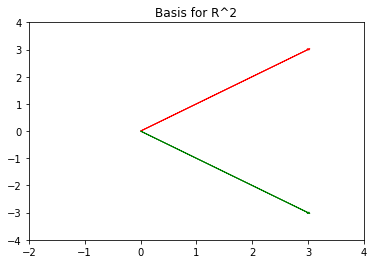

In [ ]:
plt.arrow(0,0, R1[0], R1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, R2[0], R2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-2,4)          
plt.ylim(-4,4)
plt.title("Basis for R^2")
plt.show()

6.2 What does it mean to form a basis?

In [ ]:
#It's still not very clear to me, but it sounds like they can't be multiples of each other 
#and the combination of them must come out to either 1 or 0 - so if rotated around the axis 
#they will conceivably span the entire space and they are linearly independent. 

7.1 What is the Rank of P?
$$\begin{align}
P = \begin{bmatrix} 
1 &amp; 2 &amp; 3 \\
 -1 &amp; 0 &amp; 7 \\
4 &amp; 8  &amp; 2
\end{bmatrix}
\end{align}$$

In [ ]:
#The rank of P is 3

In [ ]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [ ]:
np.linalg.matrix_rank(P)

3

7.2 What does the rank of a matrix tell us?

In [ ]:
#Maximum number of linearly independent column vectors or row vectors in the matrix. 



8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$
$$\begin{align}
v = \begin{bmatrix} 1 &amp; 3 \end{bmatrix}
\end{align}$$$$\begin{align}
w = \begin{bmatrix} -1 &amp; 2 \end{bmatrix}
\end{align}$$

In [ ]:
v = np.array([1,3])
w = np.array([-1,2])


find $proj_{L}(w)$
graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [ ]:
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


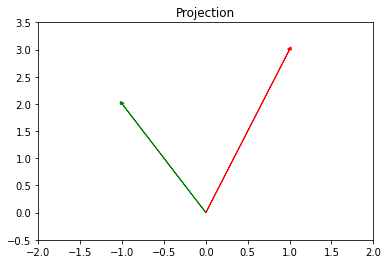

In [ ]:
plt.xlim(-2,2)          
plt.ylim(-0.5,3.5)
axes = plt.gca()

plt.arrow(0,0, v[0], v[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, w[0], w[1],head_width=.05, head_length=0.05, color ='green')
plt.title("Projection")
plt.show()

In [ ]:
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


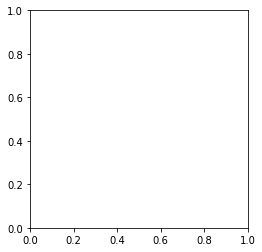

In [ ]:
axes = plt.gca()
plt.axes().set_aspect('equal')

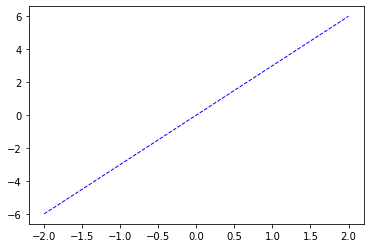

In [ ]:
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)